# Training a simple Perceptron in NumPy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs #for data generatio

In [2]:
#install animation lib
!pip install celluloid --quiet

In [3]:
#make the same problem as last week...
X, y = make_blobs(n_samples=100, centers=2, n_features=2,center_box=(2,10),random_state=42)

#normalize y to [-1,1]
y=(y*2-1)

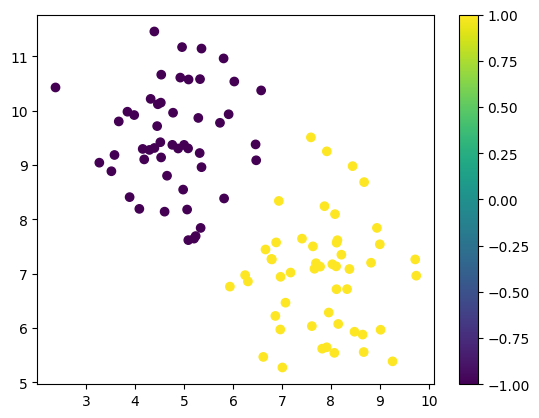

In [4]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.colorbar()

## Before: Parameterize the classifier hyper-plane
* find $w$ and $b$

In [5]:
def plot_line_from_normal_vector_and_offset(normal_vector, offset, x_range=None, ax=None, **kwargs):
    """
    Plots a 2D line defined by its normal vector w and offset b such that wx + b = 0.

    Args:
        normal_vector (list or numpy.ndarray): A 2D vector representing the normal to the line (w). Must be of length 2.
        offset (float): The offset (b) such that w.x + b = 0.
        x_range (tuple, optional): A tuple (xmin, xmax) specifying the range of x-values to plot.
                                     If None (default), a reasonable range is automatically determined.
        ax (matplotlib.axes._axes.Axes, optional): The matplotlib axes object to plot on. If None (default),
                                                  the current axes (plt.gca()) is used, or a new figure and axes
                                                  are created.
        **kwargs: Keyword arguments to pass to the `plot` function (e.g., color, linestyle, linewidth).

    Returns:
        matplotlib.lines.Line2D: The line object created by `ax.plot`.
    """
    normal_vector = np.array(normal_vector)  # Ensure it's a NumPy array for calculations

    if normal_vector.shape != (2,):
        raise ValueError("Normal vector must be a 2D vector (length 2).")

    w1, w2 = normal_vector

    if ax is None:
        fig, ax = plt.subplots()

    if x_range is None:
        # Determine a reasonable x-range
        xmin = -5
        xmax = 5
        x_range = (xmin, xmax)

    xmin, xmax = x_range
    x = np.linspace(xmin, xmax, 100)  # Generate x-values

    if w2 != 0:
        y = (-w1 * x - offset) / w2  # Solve for y: w1*x + w2*y + b = 0  =>  y = (-w1*x - b) / w2
    else:
        # Handle the case where the line is vertical (w2=0). Plot a vertical line.
        if w1 == 0:
            raise ValueError("Cannot plot line with w1=0 and w2=0.")
        x = np.full_like(x, -offset / w1)  # x is constant for a vertical line
        y = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100)  # generate y values spanning the current y-axis.



    line, = ax.plot(x, y, **kwargs)

    return line


In [16]:
#set parameter
b=0 #-> we fix b=0 for simplicity for the following experiments
w=np.array([1,-1])

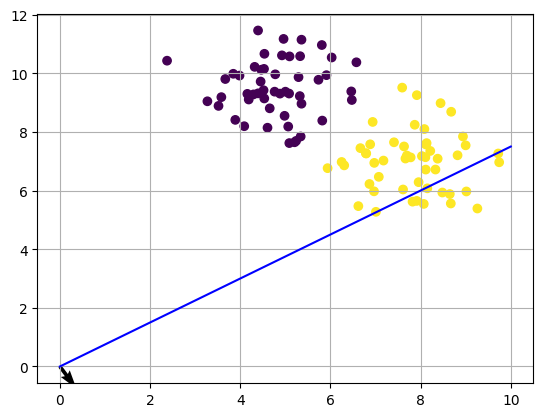

In [27]:
line1 = plot_line_from_normal_vector_and_offset(w, b, color='blue',x_range=[0,10])
plt.scatter(X[:,0],X[:,1],c=y)
plt.quiver(0,b,w[0],w[1])
plt.grid()

## Gridsearch for $w$

In [42]:
n=10
s=0.1
w=np.array([0.0,0.0])
err=np.zeros((2*int(n/s),2*int(n/s)))
for w0 in np.arange(-n,n,s):
    for w1 in np.arange(-n,n,s):
        w[0]=(float(w0)/float(n*s))
        w[1]=(float(w1)/float(n*s))
        err[int(n/s+w0/s),int(n/s+w1/s)]=(y==np.sign(w.dot(X.T))).sum()

(np.float64(-0.5), np.float64(199.5), np.float64(199.5), np.float64(-0.5))

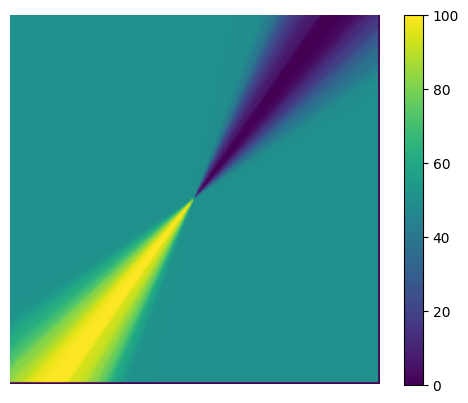

In [43]:
plt.imshow(err)
plt.colorbar()
plt.axis("off" )

In [44]:
#get max valua
pos=np.unravel_index(err.argmax(), err.shape)
print(pos)
w=np.array([n-pos[1]*s,n-pos[0]*s])
w

(np.int64(103), np.int64(96))


array([ 0.4, -0.3])

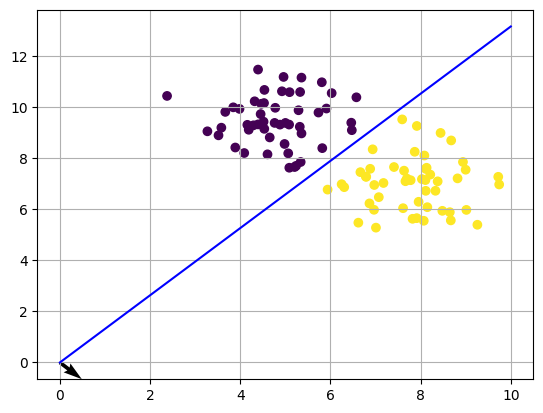

In [57]:
line1 = plot_line_from_normal_vector_and_offset(w, b, color='blue',x_range=[0,10])
plt.scatter(X[:,0],X[:,1],c=y)
plt.quiver(0,b,w[0],w[1])
plt.grid()

In [49]:
#test
y==np.sign(w.dot(X.T)+b)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

## Now: learn only $w$ by gradient based optimization
$b$ ist just a linear scaling that can be implicitely included in a non -normalized $w$

In [59]:
# init random w
w=np.random.random(2)

In [60]:
w


array([0.61005932, 0.84405524])

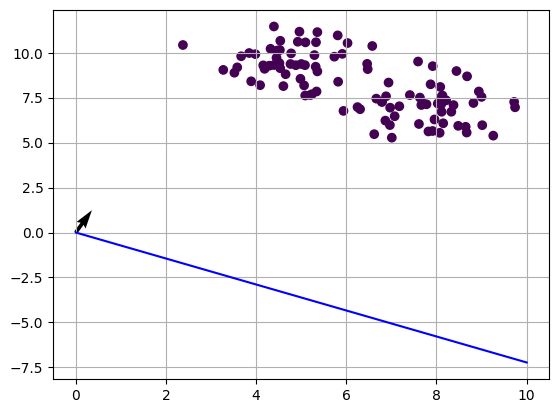

In [61]:
#visualize init classification results
res=np.sign(w.dot(X.T)) #activation
line1 = plot_line_from_normal_vector_and_offset(w, b, color='blue',x_range=[0,10])
plt.scatter(X[:,0],X[:,1],c=res)
plt.quiver(0,b,w[0],w[1])
plt.grid()




In [62]:
#gradient descent for singe perceptron
def train_gd(X, Y):
    w = np.random.random(2)
    eta = 0.01 #learningrate
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w)*Y[i]) <= 0: #is classification wrong?
                w = w + eta*X[i]*Y[i]
    return w


In [63]:
w=train_gd(X,y)
print(w)

[ 0.35513468 -0.28210825]


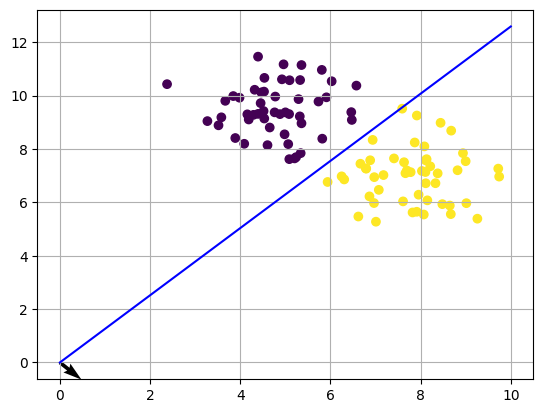

In [65]:
#visualize init calssification results

res=np.sign(w.dot(X.T)) #activation
line1 = plot_line_from_normal_vector_and_offset(w, b, color='blue',x_range=[0,10])
plt.scatter(X[:,0],X[:,1],c=res)
plt.quiver(0,b,w[0],w[1])
plt.grid()



In [66]:
#train with loss plot
from celluloid import Camera

def train_gd_plot(X, Y):

    w = np.random.random(2)
    eta = 0.001
    n = 3
    errors = []

    camera = Camera(plt.figure())

    for t in range(n):
        for i, x in enumerate(X):
            if (np.dot(X[i], w)*Y[i]) <= 0:
                total_error = (np.dot(X[i], w)*Y[i])
                w = w + eta*X[i]*Y[i]
            errors.append(total_error*-1)
            val=np.sign(w.dot(X.T))
            plt.scatter(X[:,0],X[:,1],c=val)
            plt.annotate("iter:"+str(i*n+i)+"\n w=("+str(w[0])+","+str(w[1])+")\n error:"+str(total_error), xy=(0.10, 0.90), xycoords='axes fraction')

            #plt.xlabel("iter:"+str(i*n+i)+"\n w=("+str(w[0])+","+str(w[1])+")\n error:"+str(total_error))
            camera.snap()

    anim = camera.animate(blit=True)
    anim.save('train_video.gif')


    return w, errors


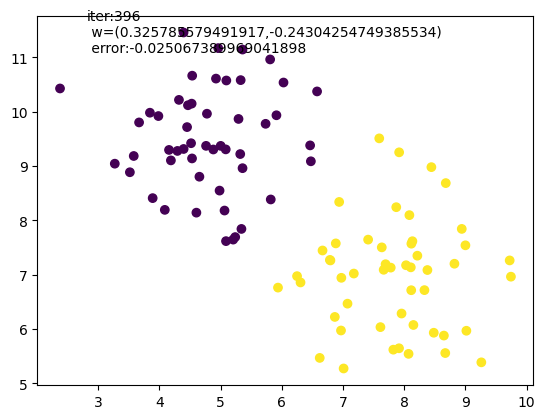

In [67]:
w,errors=train_gd_plot(X, y)

In [68]:
#result:
w

array([ 0.32578558, -0.24304255])

Text(0, 0.5, 'Total Loss')

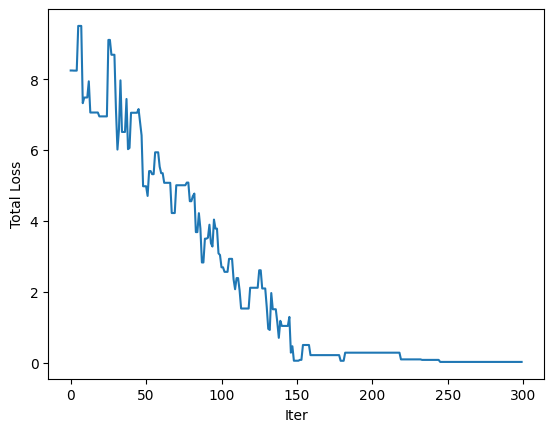

In [69]:
#plot loss
plt.figure()
plt.plot(errors)
plt.xlabel('Iter')
plt.ylabel('Total Loss')

<img src="https://github.com/keuperj/DeepLearning25/blob/main/week_3/train_video.gif?raw=1">